In [1]:
import pandas as pd

# Load CSV (replace with your actual file path or name)
df = pd.read_csv("prescription_drug_abuse_dataset.csv")

# Preview the data
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Admission Type,Discharge Date,Medication,Test Results,Prescription_ID,Prescription_Date,Refill_Count,Dosage_mg,Pharmacy,Drug_Class
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,...,Urgent,2024-02-02,Paracetamol,Normal,RX000001,2024-01-27,0,500.0,Wellness Pharmacy,Non-opioid
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,...,Emergency,2019-08-26,Ibuprofen,Inconclusive,RX000002,2019-08-15,2,200.0,Wellness Pharmacy,NSAID
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,...,Emergency,2022-10-07,Aspirin,Normal,RX000003,2022-09-17,5,300.0,Wellness Pharmacy,NSAID
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,...,Elective,2020-12-18,Ibuprofen,Abnormal,RX000004,2020-11-17,0,200.0,CityMeds,NSAID
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,...,Urgent,2022-10-09,Penicillin,Abnormal,RX000005,2022-09-14,1,250.0,HealthFirst RX,Other


In [2]:
# Remove spaces and convert to lowercase in column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Show cleaned column names
print(df.columns)


Index(['name', 'age', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_results', 'prescription_id', 'prescription_date',
       'refill_count', 'dosage_mg', 'pharmacy', 'drug_class'],
      dtype='object')


In [3]:
# Convert date columns to datetime format
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'], errors='coerce')
df['discharge_date'] = pd.to_datetime(df['discharge_date'], errors='coerce')
df['prescription_date'] = pd.to_datetime(df['prescription_date'], errors='coerce')

# Create hospital stay duration column
df['stay_duration_days'] = (df['discharge_date'] - df['date_of_admission']).dt.days

# Check updated date columns
df[['date_of_admission', 'discharge_date', 'stay_duration_days']].head()


,date_of_admission,discharge_date,stay_duration_days
0,2024-01-31,2024-02-02,2
1,2019-08-20,2019-08-26,6
2,2022-09-22,2022-10-07,15
3,2020-11-18,2020-12-18,30
4,2022-09-19,2022-10-09,20


In [4]:
# Shape and data types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Null values
print("\nMissing Values:\n", df.isnull().sum())

# Basic summary
df.describe()


Shape: (55500, 22)

Data Types:
 name                          object
age                            int64
gender                        object
blood_type                    object
medical_condition             object
date_of_admission     datetime64[ns]
doctor                        object
hospital                      object
insurance_provider            object
billing_amount               float64
room_number                    int64
admission_type                object
discharge_date        datetime64[ns]
medication                    object
test_results                  object
prescription_id               object
prescription_date     datetime64[ns]
refill_count                   int64
dosage_mg                    float64
pharmacy                      object
drug_class                    object
stay_duration_days             int64
dtype: object

Missing Values:
 name                  0
age                   0
gender                0
blood_type            0
medical_condition     0
d

,age,date_of_admission,billing_amount,room_number,discharge_date,prescription_date,refill_count,dosage_mg,stay_duration_days
count,55500.000000,55500,55500.000000,55500.000000,55500,55500,55500.000000,55500.000000,55500.000000
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504,2021-10-29 01:14:54.356756992,2.502018,299.839640,15.509009
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00,2019-05-03 00:00:00,0.000000,200.000000,1.000000
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00,2020-07-25 00:00:00,1.000000,250.000000,8.000000
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00,2021-10-29 00:00:00,3.000000,250.000000,15.000000
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00,2023-01-31 00:00:00,4.000000,300.000000,23.000000
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00,2024-05-06 00:00:00,5.000000,500.000000,30.000000
std,19.602454,NaN,14211.454431,115.243069,NaN,NaN,1.710317,104.806949,8.659600


In [5]:
# Standardize patient name and gender fields
df['name'] = df['name'].str.title()
df['gender'] = df['gender'].str.capitalize()
df['drug_class'] = df['drug_class'].str.capitalize()
df['medication'] = df['medication'].str.title()


In [6]:
# Flag potential abuse cases (you can tweak the logic as needed)
def detect_abuse(row):
    if row['refill_count'] > 3 and row['dosage_mg'] > 300:
        return 'High'
    elif row['refill_count'] > 2:
        return 'Medium'
    else:
        return 'Low'

df['abuse_risk'] = df.apply(detect_abuse, axis=1)


In [7]:
df['abuse_risk'].value_counts()


abuse_risk
Low       27685
Medium    24116
High       3699
Name: count, dtype: int64

In [8]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['<18', '18-35', '36-50', '51-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df[['age', 'age_group']].head()


,age,age_group
0,30,18-35
1,62,51-65
2,76,65+
3,28,18-35
4,43,36-50


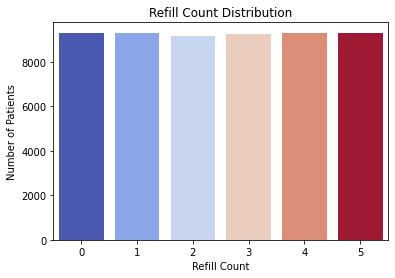

In [11]:
sns.countplot(data=df, x='refill_count', hue='refill_count', palette='coolwarm', legend=False)
plt.title("Refill Count Distribution")
plt.xlabel("Refill Count")
plt.ylabel("Number of Patients")
plt.show()


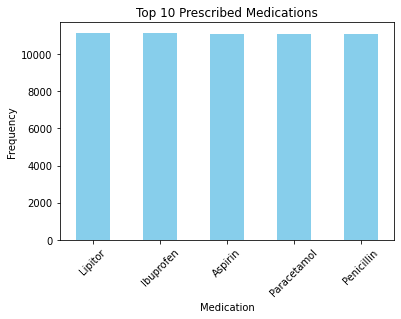

In [12]:
top_meds = df['medication'].value_counts().head(10)
top_meds.plot(kind='bar', color='skyblue')
plt.title("Top 10 Prescribed Medications")
plt.xlabel("Medication")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


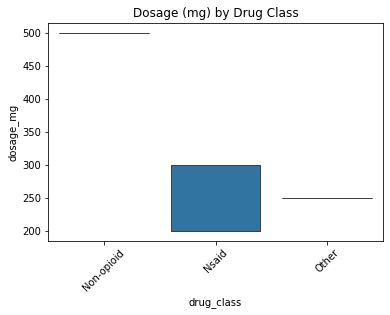

In [14]:
sns.boxplot(data=df, x='drug_class', y='dosage_mg')
plt.title("Dosage (mg) by Drug Class")
plt.xticks(rotation=45)
plt.show()


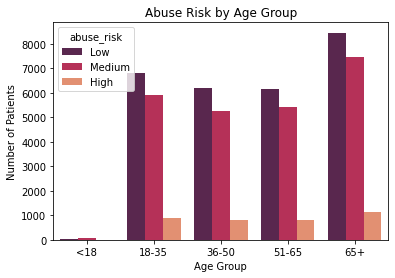

In [15]:
sns.countplot(data=df, x='age_group', hue='abuse_risk', palette='rocket')
plt.title("Abuse Risk by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.show()


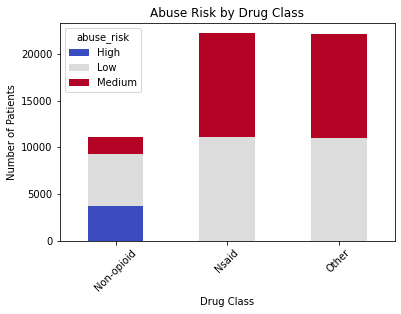

In [16]:
abuse_by_drug = df.groupby('drug_class')['abuse_risk'].value_counts().unstack().fillna(0)
abuse_by_drug.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Abuse Risk by Drug Class")
plt.ylabel("Number of Patients")
plt.xlabel("Drug Class")
plt.xticks(rotation=45)
plt.show()


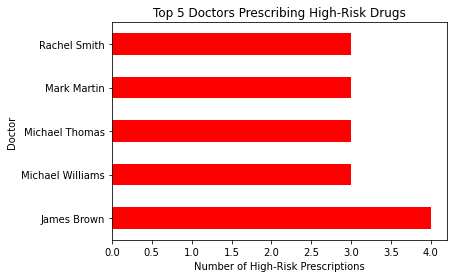

In [17]:
high_risk_df = df[df['abuse_risk'] == 'High']

top_doctors = high_risk_df['doctor'].value_counts().head(5)
top_doctors.plot(kind='barh', color='red')
plt.title("Top 5 Doctors Prescribing High-Risk Drugs")
plt.xlabel("Number of High-Risk Prescriptions")
plt.ylabel("Doctor")
plt.show()


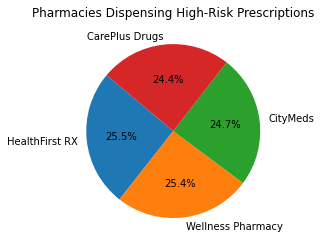

In [18]:
pharmacies = high_risk_df['pharmacy'].value_counts()
pharmacies.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Pharmacies Dispensing High-Risk Prescriptions")
plt.ylabel("")
plt.show()


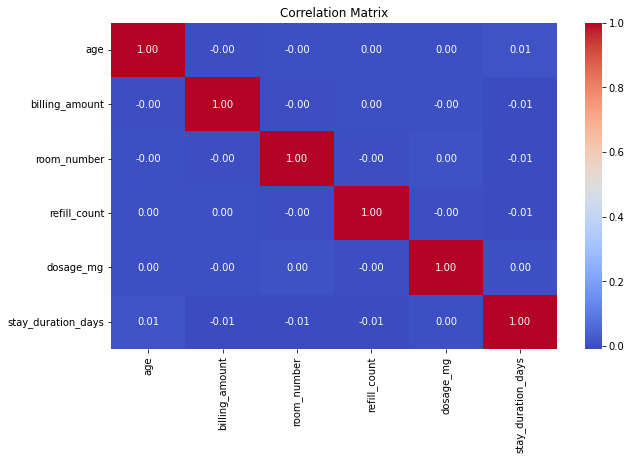

In [19]:
import numpy as np

# Select numeric features
numeric_cols = df.select_dtypes(include=np.number)

# Correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [20]:
# Save the cleaned and updated DataFrame to a new CSV file
df.to_csv("updated_prescription_data.csv", index=False)
